# Python introduction - session 4 
## Learning about the real power of python with modules
## Biopython, pandas, matplotlib and bedtools wrapped into the jupyter

If you get stuck in an endless loop hit the **"STOP" button (black square)** above or our good friend from bash, **ctrl+c**  
You know you are stuck in a loop if you see **In \[\*\]:** forever

### Installation reminder

If you want to install this whole tool stack on your own machine we recommend the following.

#### Windows

* Install the [Ubuntu subsystem](https://docs.microsoft.com/en-us/windows/wsl/install-win10)
* Install the Linux version of [Anaconda](https://www.anaconda.com/products/individual) into your subsystem.
* Setup [Bioconda](https://bioconda.github.io/) in your subsystem
* Install programs and modules like...

``conda install biopython``

#### Mac

* Install the Mac version of [Anaconda](https://www.anaconda.com/products/individual) on your command line/terminal.
* Setup [Bioconda](https://bioconda.github.io/) on your command line/terminal.
* Install programs and modules like...

``conda install biopython``

### Objectives

* Interogate larger dataset using biopython and pandas.
* Use pandas to combine larger datasets.
* Plot expression profiles across multiple condiditions in Arabidopsis.
* Extract promoter sequences of highly expressed genes.
* Analyze the composition of promoter sequences to identify motifs.

## Reminder: Python objects are like cats and dogs

In [1]:
%matplotlib inline
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

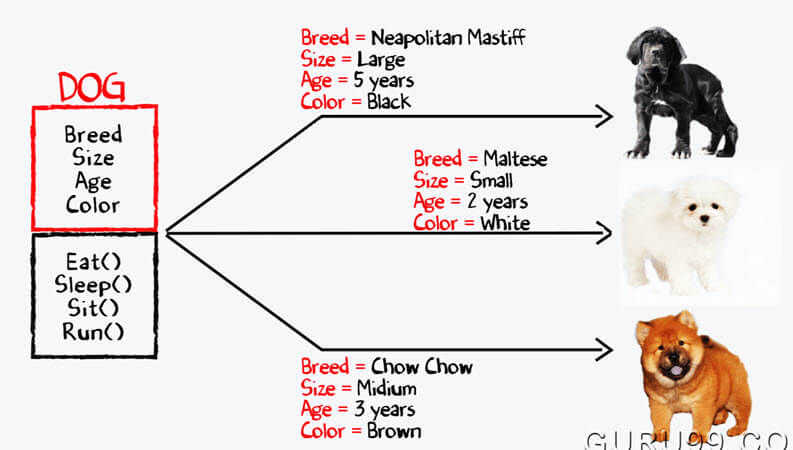

In [2]:
Image(filename='./figures/dogs_as_objects.jpg')

### Intro to [Biopython](https://biopython.org/wiki/Documentation)

* We will download the complete [Arabidopsis](https://www.arabidopsis.org/index.jsp) coding sequences.
* We will read them all in at once.
* We will translate them all into protein sequences.
* We will calcualte their pi values.
* We will do some basic plotting.

In [3]:
!gunzip datasets/TAIR10_chr_all.fa.gz

#### Let's download sequences from [here](https://www.arabidopsis.org/download/index-auto.jsp?dir=%2Fdownload_files%2FGenes%2FAraport11_genome_release%2FAraport11_blastsets)

In [4]:
!wget https://www.arabidopsis.org/download_files/Genes/Araport11_genome_release/Araport11_blastsets/Araport11_genes.201606.cds.fasta.gz

/bin/sh: wget: command not found


In [5]:
!gunzip Araport11_genes.201606.cds.fasta.gz

gunzip: can't stat: Araport11_genes.201606.cds.fasta.gz (Araport11_genes.201606.cds.fasta.gz.gz): No such file or directory


In [6]:
!head Araport11_genes.201606.cds.fasta

>AT1G01010.1 | NAC domain containing protein 1 | Chr1:3760-5630 FORWARD LENGTH=1290 | 201606
ATGGAGGATCAAGTTGGGTTTGGGTTCCGTCCGAACGACGAGGAGCTCGTTGGTCACTAT
CTCCGTAACAAAATCGAAGGAAACACTAGCCGCGACGTTGAAGTAGCCATCAGCGAGGTC
AACATCTGTAGCTACGATCCTTGGAACTTGCGCTTCCAGTCAAAGTACAAATCGAGAGAT
GCTATGTGGTACTTCTTCTCTCGTAGAGAAAACAACAAAGGGAATCGACAGAGCAGGACA
ACGGTTTCTGGTAAATGGAAGCTTACCGGAGAATCTGTTGAGGTCAAGGACCAGTGGGGA
TTTTGTAGTGAGGGCTTTCGTGGTAAGATTGGTCATAAAAGGGTTTTGGTGTTCCTCGAT
GGAAGATACCCTGACAAAACCAAATCTGATTGGGTTATCCACGAGTTCCACTACGACCTC
TTACCAGAACATCAGAGGACATATGTCATCTGCAGACTTGAGTACAAGGGTGATGATGCG
GACATTCTATCTGCTTATGCAATAGATCCCACTCCCGCTTTTGTCCCCAATATGACTAGT


## Let's reconstruct out lists from last time for all CDS in Arabidopsis

In [7]:
from Bio import SeqIO
from Bio.SeqUtils import IsoelectricPoint as IP
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
filename = 'Araport11_genes.201606.cds.fasta'

In [9]:
## Read in all CDS as list (ordered!)
arabidopsis_cds = []
for seq in SeqIO.parse(filename, 'fasta'):
    arabidopsis_cds.append(seq)    

In [10]:
###Let's make a cds length list and an ID list
cds_length = []
ID_list = []
for cds in arabidopsis_cds:
    cds_length.append(len(cds.seq))
    ID_list.append(cds.id)

In [11]:
###Let's make a protein list and a protein length list
arabidopsis_proteins = []
protein_length = []
for cds in arabidopsis_cds:
    tmp_protein = cds.translate() #translate sequence
    tmp_protein.id = cds.id #add id to tmp_protein object
    tmp_protein.name = cds.name #add name to tmp_protein object 
    tmp_protein.description = cds.description #add description to tmp_protein object
    arabidopsis_proteins.append(tmp_protein) #store it
    protein_length.append(len(tmp_protein)) #store length

In [12]:
protein_pi_values = []
for protein in arabidopsis_proteins:
    tmp_protein = IP.IsoelectricPoint(protein.seq) #generate a Isoelectric point object to be able to calcuate pi values
    tmp_protein_pi = tmp_protein.pi() #calculate pi value
    protein_pi_values.append(tmp_protein_pi)

## Exercise I

* Make a dictionary called ara_dict
* the keys 'CDS_ID', 'CDS_length', 'protein_length', 'protein_pi_value'
* the values are the corresponding lists we generated above

In [13]:
ara_dict = {}
ara_dict['CDS_ID'] = ID_list
ara_dict['CDS_length'] = cds_length
ara_dict['protein_length'] = protein_length
ara_dict['protein_pi_value'] = protein_pi_values

### Intro to [pandas](https://pandas.pydata.org/)

pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language. 

* We will generate a dataframe (Table) from our own input data
* We will subset the dataframe to find the longest and shortes CDS in Arabidopsis
* We will caclulate the mean, median, and standard deviation for our dataset
* We will do some basic plotting.
* We will load some public expression datasets.
* We will interogate this dataset.
* We will pull out the promoters of the most highly expressed genes and look for a specific hormone response elements.

#### The two main objects in pandas 

* Series to store one dimensional data
* Dataframe to store two dimnesional data

See for a quick intro [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)

In [14]:
ara_df = pd.DataFrame.from_dict(ara_dict)

In [15]:
ara_df

,CDS_ID,CDS_length,protein_length,protein_pi_value
0,AT1G01010.1,1290,430,5.101379
1,AT1G01020.1,738,246,8.908997
2,AT1G01020.2,576,192,8.795715
3,AT1G01020.3,711,237,9.136292
4,AT1G01020.4,711,237,9.136292
...,...,...,...,...
48354,ATMG01350.1,438,146,4.690613
48355,ATMG01360.1,1584,528,7.786682
48356,ATMG01370.1,336,112,10.272400
48357,ATMG01400.1,318,106,10.078308


In [16]:
## look at the top
ara_df.head()

,CDS_ID,CDS_length,protein_length,protein_pi_value
0,AT1G01010.1,1290,430,5.101379
1,AT1G01020.1,738,246,8.908997
2,AT1G01020.2,576,192,8.795715
3,AT1G01020.3,711,237,9.136292
4,AT1G01020.4,711,237,9.136292


In [17]:
## look at the bottom
ara_df.tail()

,CDS_ID,CDS_length,protein_length,protein_pi_value
48354,ATMG01350.1,438,146,4.690613
48355,ATMG01360.1,1584,528,7.786682
48356,ATMG01370.1,336,112,10.272400
48357,ATMG01400.1,318,106,10.078308
48358,ATMG01410.1,615,205,9.579773


In [18]:
## Get the column index
ara_df.columns

Index(['CDS_ID', 'CDS_length', 'protein_length', 'protein_pi_value'], dtype='object')

In [19]:
## Get row index
ara_df.index

RangeIndex(start=0, stop=48359, step=1)

In [20]:
## Get specific columns
ara_df['CDS_ID']

0        AT1G01010.1
1        AT1G01020.1
2        AT1G01020.2
3        AT1G01020.3
4        AT1G01020.4
            ...     
48354    ATMG01350.1
48355    ATMG01360.1
48356    ATMG01370.1
48357    ATMG01400.1
48358    ATMG01410.1
Name: CDS_ID, Length: 48359, dtype: object

In [21]:
## Get a gene id column for later use
ara_df['Gene_ID'] = ara_df['CDS_ID'].apply(lambda x: x.split('.')[0])

In [22]:
ara_df['Gene_ID']

0        AT1G01010
1        AT1G01020
2        AT1G01020
3        AT1G01020
4        AT1G01020
           ...    
48354    ATMG01350
48355    ATMG01360
48356    ATMG01370
48357    ATMG01400
48358    ATMG01410
Name: Gene_ID, Length: 48359, dtype: object

In [23]:
## Reset the index
ara_df.index = ara_df['Gene_ID']

In [24]:
## Drop a column
ara_df.drop('Gene_ID', axis=1)

,CDS_ID,CDS_length,protein_length,protein_pi_value
Gene_ID,,,,
AT1G01010,AT1G01010.1,1290,430,5.101379
AT1G01020,AT1G01020.1,738,246,8.908997
AT1G01020,AT1G01020.2,576,192,8.795715
AT1G01020,AT1G01020.3,711,237,9.136292
AT1G01020,AT1G01020.4,711,237,9.136292
...,...,...,...,...
ATMG01350,ATMG01350.1,438,146,4.690613
ATMG01360,ATMG01360.1,1584,528,7.786682
ATMG01370,ATMG01370.1,336,112,10.272400


In [25]:
## Drop a column inplace
ara_df.drop('Gene_ID', axis=1, inplace = True)

### A word about pandas axis

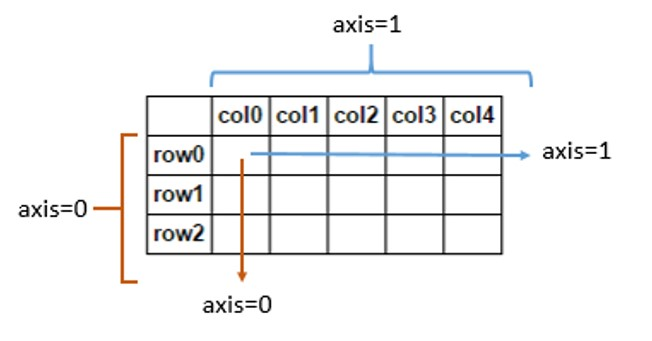

In [26]:
Image(filename='./figures/axis_pandas.jpg')

### Getting the mean, max, min, and such from a dataset

In [27]:
## maximum
ara_df['CDS_length'].max()

16203

In [28]:
## mean
ara_df['CDS_length'].mean()

1296.7666618416426

### Exercise II

* Get the mean value of protein_length column
* Get the max value of the protein_length column
* Get the standard deviation of the protein lenght column
* Get the mean value of the protein_pi_value column

### Plotting is your friend and build into pandas

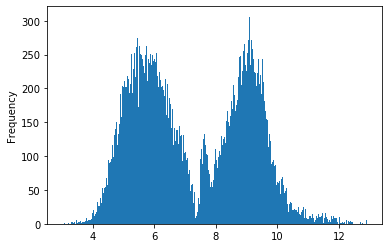

In [29]:
##histogram plot of protein_pi_value
ara_df['protein_pi_value'].plot.hist(bins=500)

Text(0.5, 0, 'PI value [pH]')

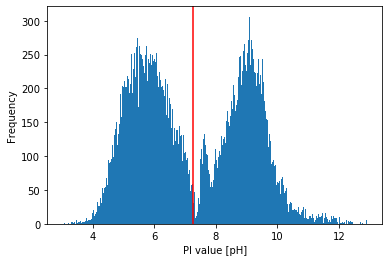

In [30]:
##histogram plot with horizontal line of the 
ara_df['protein_pi_value'].plot.hist(bins=500)
plt.axvline(ara_df['protein_pi_value'].mean(), c='r')
plt.xlabel('PI value [pH]')

## Always look at your distributions genome data is never?! normally distributed

### Subsetting your data

In [31]:
## CDS that are longer than the mean
ara_df['CDS_length'] > ara_df['CDS_length'].mean() 

Gene_ID
AT1G01010    False
AT1G01020    False
AT1G01020    False
AT1G01020    False
AT1G01020    False
             ...  
ATMG01350    False
ATMG01360     True
ATMG01370    False
ATMG01400    False
ATMG01410    False
Name: CDS_length, Length: 48359, dtype: bool

In [32]:
## Dataframe and Series have shapes
ara_df['CDS_length'].shape

(48359,)

In [33]:
## Dataframe and Series have shapes
ara_df.shape

(48359, 4)

In [34]:
(ara_df['CDS_length'] > ara_df['CDS_length'].mean()).shape

(48359,)

In [35]:
## Because comparisons return the same shaped boolean series we can use them to subset dataframes
ara_df[ara_df['CDS_length'] > ara_df['CDS_length'].mean()]

,CDS_ID,CDS_length,protein_length,protein_pi_value
Gene_ID,,,,
AT1G01040,AT1G01040.1,5730,1910,5.877258
AT1G01040,AT1G01040.2,5733,1911,5.877258
AT1G01060,AT1G01060.1,1938,646,5.765198
AT1G01060,AT1G01060.2,1938,646,5.765198
AT1G01060,AT1G01060.3,1938,646,5.765198
...,...,...,...,...
ATMG00513,ATMG00513.1,1446,482,7.583801
ATMG00520,ATMG00520.1,2019,673,10.063538
ATMG00580,ATMG00580.1,1488,496,9.274353


In [36]:
### We can also use boolean series to count
(ara_df['CDS_length'] > ara_df['CDS_length'].mean()).sum()

18702

### Exercise III

* How many proteins are longer than 1000 aa.
* How many CDS are longer than the mean plus two standard deviations.
* What is the mean length of proteins longer than 2000 aa.

### Let's look at some public Arabidopsis gene expression data after Auxin (a hormone) treatment

The paper is about gene expression after two different hormone treatments in Arabidopsis. We will use this to learn more about pandas and to extract promoters in the next session.

[Spatiotemporal Brassinosteroid Signaling and Antagonism with Auxin Pattern Stem Cell Dynamics in Arabidopsis Roots](https://www.sciencedirect.com/science/article/pii/S0960982215002158#mmc2) 

The basic treatments we are interested in are in the Columbia (WT) background:

* Auxin alone.
* Brassinosteroid alone.
* Auxin and Brassinosteroid (but this wasn't really in the supplement).


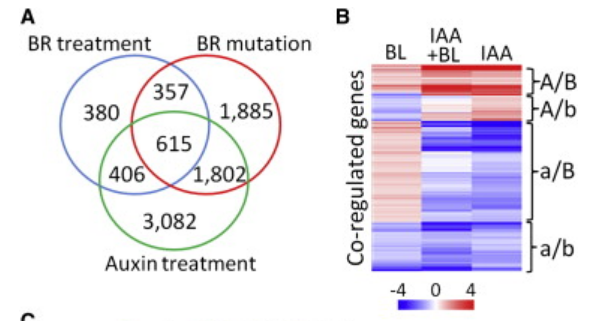

In [37]:
Image('./figures/Expression_analysis.png')

### This is how the data actually looks like

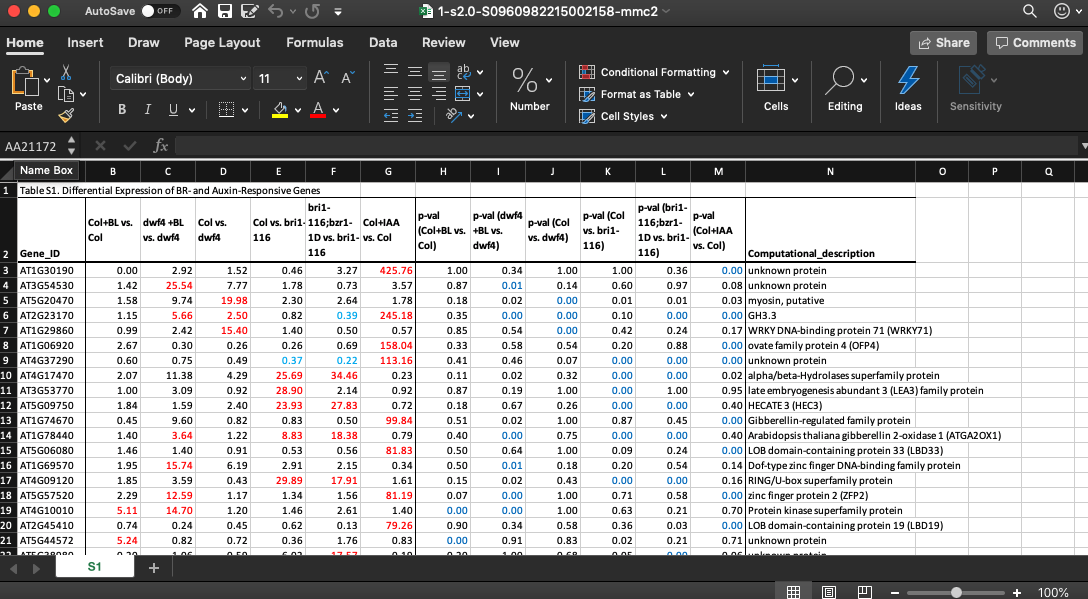

In [38]:
Image('figures/Excel_screenshot.png')

### Let's read in this excel table into pandas

In [39]:
?pd.read_excel

In [40]:
## Excel file name
excel_fn = 'datasets/1-s2.0-S0960982215002158-mmc2.xlsx'

In [41]:
### Read in excel file with specific spreadsheet and take care of excess row and index column
excel_df = pd.read_excel(excel_fn, sheet_name='S1', skiprows=1, index_col=0)

In [42]:
###Let's look at it
excel_df.head()

,Col+BL vs. Col,dwf4 +BL vs. dwf4,Col vs. dwf4,Col vs. bri1-116,bri1-116;bzr1-1D vs. bri1-116,Col+IAA vs. Col,p-val (Col+BL vs. Col),p-val (dwf4 +BL vs. dwf4),p-val (Col vs. dwf4),p-val (Col vs. bri1-116),p-val (bri1-116;bzr1-1D vs. bri1-116),p-val (Col+IAA vs. Col),Computational_description
Gene_ID,,,,,,,,,,,,,
AT1G30190,0.000000,2.916180,1.521655,0.458109,3.267628,425.761346,1.000000,3.428875e-01,1.000000e+00,1.000000,3.596949e-01,2.773781e-61,unknown protein
AT3G54530,1.420029,25.537440,7.767001,1.776026,0.729292,3.565291,0.866861,6.853218e-03,1.439830e-01,0.595241,9.679734e-01,8.344478e-02,unknown protein
AT5G20470,1.578872,9.744589,19.981156,2.299108,2.636878,1.778351,0.178081,2.249521e-02,1.112062e-04,0.011322,1.103742e-02,2.803243e-02,"myosin, putative"
AT2G23170,1.147703,5.656284,2.501096,0.817718,0.385468,245.184873,0.353236,1.004079e-25,7.857439e-07,0.097441,6.955262e-12,0.000000e+00,GH3.3
AT1G29860,0.992379,2.418156,15.395733,1.404272,0.502683,0.574224,0.847942,5.360708e-01,1.777666e-05,0.420080,2.389150e-01,1.716294e-01,WRKY DNA-binding protein 71 (WRKY71)


### Let's look into indexing of rows and columns

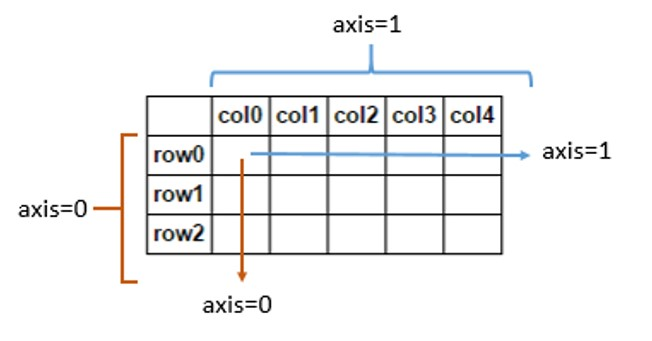

In [43]:
Image(filename='./figures/axis_pandas.jpg')

In [44]:
## Numerical indexing (exclusive [,)])
excel_df.iloc[1,1]

25.537439644379

In [45]:
## Name indexing (inclusive [,])
excel_df.loc['AT3G54530', 'dwf4 +BL vs. dwf4']

25.537439644379

In [46]:
## Name indexing (inclusive [,])
excel_df.loc['AT3G54530':'AT5G20470', 'dwf4 +BL vs. dwf4']

Gene_ID
AT3G54530    25.537440
AT5G20470     9.744589
Name: dwf4 +BL vs. dwf4, dtype: float64

In [47]:
## Numerical indexing (exclusive [,)])
excel_df.iloc[1:2,1]

Gene_ID
AT3G54530    25.53744
Name: dwf4 +BL vs. dwf4, dtype: float64

In [48]:
### Let's subset the dataframe to only contain the columns
### 'Col+BL vs. Col', 'Col+IAA vs. Col', 'Computational_description'

excel_df = excel_df.loc[:, ['Col+BL vs. Col', 'Col+IAA vs. Col', 'Computational_description']]

In [49]:
excel_df.head()

,Col+BL vs. Col,Col+IAA vs. Col,Computational_description
Gene_ID,,,
AT1G30190,0.000000,425.761346,unknown protein
AT3G54530,1.420029,3.565291,unknown protein
AT5G20470,1.578872,1.778351,"myosin, putative"
AT2G23170,1.147703,245.184873,GH3.3
AT1G29860,0.992379,0.574224,WRKY DNA-binding protein 71 (WRKY71)


### Exercise V

* What is the differential expression after IAA treatment of gene 'AT3G46810'
* What is the maximal differential expression of BL treatment.
* What is the BL expression of the 1493 gene.

In [50]:
###Double indexing "and"
excel_df[(excel_df['Col+BL vs. Col'] > 5) & (excel_df['Col+IAA vs. Col'] > 5)]

,Col+BL vs. Col,Col+IAA vs. Col,Computational_description
Gene_ID,,,
AT4G27300,5.236277,39.149841,S-locus lectin protein kinase family protein
AT5G22520,10.470725,32.105759,unknown protein
AT2G19146,6.570213,24.396241,FUNCTIONS IN: molecular_function unknown
AT3G49700,5.825020,15.199336,1-aminocyclopropane-1-carboxylate synthase 9 (...
AT2G17040,5.832065,12.908143,NAC domain containing protein 36 (NAC036)
AT5G07310,5.003708,11.876724,Integrase-type DNA-binding superfamily protein
AT2G27220,8.215217,5.333422,BEL1-like homeodomain 5 (BLH5)
AT2G28671,6.664032,5.153116,unknown protein
AT1G17710,6.476395,8.402895,Pyridoxal phosphate phosphatase-related protein


In [51]:
###Double indexing "or"
excel_df[(excel_df['Col+BL vs. Col'] > 5) | (excel_df['Col+IAA vs. Col'] > 5)]

,Col+BL vs. Col,Col+IAA vs. Col,Computational_description
Gene_ID,,,
AT1G30190,0.000000,425.761346,unknown protein
AT2G23170,1.147703,245.184873,GH3.3
AT1G06920,2.665613,158.041571,ovate family protein 4 (OFP4)
AT4G37290,0.601231,113.163553,unknown protein
AT1G74670,0.446195,99.836051,Gibberellin-regulated family protein
...,...,...,...
AT2G37740,8.391748,5.366633,zinc-finger protein 10 (ZFP10)
AT3G55970,7.537798,0.741648,jasmonate-regulated gene 21 (JRG21)
AT3G15670,0.336104,8.897547,Late embryogenesis abundant protein (LEA) fami...


### Exercise VI

* How many genes are upregulated at both conditions.
* How many genes are upgregulated in one condition only.
* Do you think the overlap or exclusion is significant and what test could you use to test for this.


In [52]:
###Sort values
excel_df.sort_values('Col+IAA vs. Col')

,Col+BL vs. Col,Col+IAA vs. Col,Computational_description
Gene_ID,,,
AT5G46900,1.483836,0.004045,Bifunctional inhibitor/lipid-transfer protein/...
AT5G23660,1.206841,0.007190,homolog of Medicago truncatula MTN3 (MTN3)
AT1G02575,0.683715,0.008310,NaN
AT5G46890,1.102536,0.009498,Bifunctional inhibitor/lipid-transfer protein/...
AT1G05650,0.931931,0.009939,Pectin lyase-like superfamily protein
...,...,...,...
AT1G74670,0.446195,99.836051,Gibberellin-regulated family protein
AT4G37290,0.601231,113.163553,unknown protein
AT1G06920,2.665613,158.041571,ovate family protein 4 (OFP4)


In [53]:
###Sort values
excel_df.sort_values('Col+IAA vs. Col', ascending=False, inplace=True)

In [54]:
###let's look at the top 100 differentially expressed (>5) expressed genes after IAA treatment
###that are also differentially expressed in BL conditions.
sub_excel_df = excel_df[(excel_df['Col+BL vs. Col'] > 5) | (excel_df['Col+IAA vs. Col'] > 5)].iloc[:100,:]

In [55]:
sub_excel_df.head()

,Col+BL vs. Col,Col+IAA vs. Col,Computational_description
Gene_ID,,,
AT1G30190,0.000000,425.761346,unknown protein
AT2G23170,1.147703,245.184873,GH3.3
AT1G06920,2.665613,158.041571,ovate family protein 4 (OFP4)
AT4G37290,0.601231,113.163553,unknown protein
AT1G74670,0.446195,99.836051,Gibberellin-regulated family protein


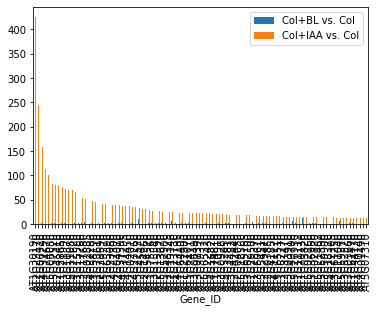

In [56]:
###Sort values
sub_excel_df.plot.bar()

### Let's explore the data a bit more and ask the questions like

* What is the pi value distirubtion of BL upregulated genes.
* What is the length distribution of IAA upregulated genes.
* ....

Remember both the ara_df and excel_df have the gene names as index

In [57]:
IAA_induced_index = excel_df[excel_df['Col+IAA vs. Col'] > 5].index

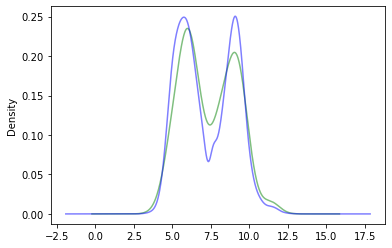

In [58]:
ara_df.loc[ara_df.index.isin(IAA_induced_index),'protein_pi_value'].plot.kde(color='g', alpha=0.5)
ara_df['protein_pi_value'].plot.kde(color='b', alpha=0.5)

In [2]:
ara_df.loc[ara_df.index.isin(IAA_induced_index),'protein_length'].plot.kde(color='g', alpha=0.5)
ara_df['protein_length'].plot.kde(color='b', alpha=0.5)

NameError: name 'ara_df' is not defined

## Let's talk about genome annotations and coordinate files

### DNA sequences are 1 dimensional strings how to express what is encoded in a DNA sequence?

### [BED formats](https://m.ensembl.org/info/website/upload/bed.html)

* It's like a string that gets indexed in python starting with 0 and being exclusive **[,)**  
* Minimum we need is the sequence identifier, start, end -> **BED3**

```ctg123   1299    9000```

* Next up is we might want to encode the name, score, and strand -> **BED6**

```ctg123   1299    9000    mRNA    .    +```

### What about if we can to link different entries with each other e.g. genes -> mRNA -> UTRs/CDS -> exons?

### [GFF3 format](https://m.ensembl.org/info/website/upload/gff3.html)

* It's a coordinate system like BED but in a different order with more columns and 1 based being inclusive **[,]**

* SeqID, source, type, start, end, score, strand, phase, attributes

``` ##gff-version 3
ctg123 . mRNA            1300  9000  .  +  .  ID=mrna0001;Name=sonichedgehog
ctg123 . exon            1300  1500  .  +  .  ID=exon00001;Parent=mrna0001
ctg123 . exon            1050  1500  .  +  .  ID=exon00002;Parent=mrna0001
ctg123 . exon            3000  3902  .  +  .  ID=exon00003;Parent=mrna0001
ctg123 . exon            5000  5500  .  +  .  ID=exon00004;Parent=mrna0001
ctg123 . exon            7000  9000  .  +  .  ID=exon00005;Parent=mrna0001 ```

### Let's download the Arabidopsis gff3 file from [here](https://www.arabidopsis.org/download/index-auto.jsp?dir=%2Fdownload_files%2FGenes%2FTAIR10_genome_release%2FTAIR10_gff3)

The aim is to get all the rows that describe genes and that are part of our upregulated list.

In [60]:
gff_header = ['SeqID', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes']

In [61]:
###read in csv
ara_gff3 = pd.read_csv

In [1]:
###let's have a look


In [63]:
###let's get the subset for 'AT1G01010' and 'type' being 'gene'
ara_gff3[(ara_gff3) & (ara_gff3)]

,SeqID,source,type,start,end,score,strand,phase,attributes
1,Chr1,TAIR10,gene,3631,5899,.,+,.,ID=AT1G01010;Note=protein_coding_gene;Name=AT1...


In [64]:
### Let's get the index 


Int64Index([1], dtype='int64')

### Remaining Lesson

* get all the Auxin (IAA) upregulated genes above 5 fold up.
* get the gene entries out of the gff file for the upregulated genes and the none-regualted genes
* get the promoters for both sets in bedformat and in fasta format
* look for the previously characterized elments **TGTCCCAT** or **GGTCCCAT** which have been shown previously to be involved in auxin (IAA) responsiveness

In [65]:
###Let's get the 'Col+IAA vs. Col' upregulated genes from the excel_df
IAA_genes = excel_df[]

In [66]:
###Let's safe them sorted
IAA_genes = IAA_genes.sort_values()

In [67]:
###Let's try to collect all the indexes (the)
IAA_gene_index = []
IAA_genes_annotated = []
###Let's make the dateset smaller
ara_gene_gff3 = ara_gff3[]
##Let's reset the index
ara_gene_gff3.


AT2G03972
AT2G07080
AT3G60957
AT4G21730
AT5G13485


In [ ]:
###Let's loop over the dataset and get all the indexes for genes we want
for gene in IAA_genes:
    tmp_index = 
    #if the length of an index is 0 there was no element found fitting the bill
    if :
        print('Gene not found in annotation file:', gene)
    
    elif :
        
    else:
        print('Multiple annotations found for the same gene:', gene)
        

In [68]:
###Let's use he indexes to get the gene gff3 of all the genes of interest
ara_gene_gff3.loc[##]

,SeqID,source,type,start,end,score,strand,phase,attributes
201,Chr1,TAIR10,gene,623765,624475,.,-,.,ID=AT1G02820;Note=protein_coding_gene;Name=AT1...
275,Chr1,TAIR10,gene,873184,874935,.,+,.,ID=AT1G03495;Note=protein_coding_gene;Name=AT1...
312,Chr1,TAIR10,gene,959869,960728,.,-,.,ID=AT1G03820;Note=protein_coding_gene;Name=AT1...
357,Chr1,TAIR10,gene,1128188,1129551,.,-,.,ID=AT1G04240;Note=protein_coding_gene;Name=AT1...
654,Chr1,TAIR10,gene,2124854,2125801,.,-,.,ID=AT1G06920;Note=protein_coding_gene;Name=AT1...
...,...,...,...,...,...,...,...,...,...
28292,Chr5,TAIR10,gene,26354853,26357866,.,+,.,ID=AT5G65890;Note=protein_coding_gene;Name=AT5...
28320,Chr5,TAIR10,gene,26430202,26430912,.,+,.,ID=AT5G66110;Note=protein_coding_gene;Name=AT5...
28399,Chr5,TAIR10,gene,26663573,26664403,.,+,.,ID=AT5G66780;Note=protein_coding_gene;Name=AT5...
28472,Chr5,TAIR10,gene,26910315,26912103,.,+,.,ID=AT5G67430;Note=protein_coding_gene;Name=AT5...


In [69]:
###Let's save it out with to_csv
ara_gene_gff3.loc[##]

### exercise I

* Find out how many upregulated IAA genes there are.
* Find out how many upregulated IAA genes where in the annotation.



### exercise II

* safe out the gff3 file in bed six format
    * Generate the correct start side for bed format being 0 based.
    * Generate a new gene name column
    * Fill in the names for the IAA genes that were annotated IAA_genes_annotated
    * Change the orientation of the columns to 'SeqID', 'Bed_start', 'end', 'name', 'score', 'strand'


In [70]:
ara_gene_gff3['Bed_start'] = ### - 1
ara_gene_gff3[###] = 'NaN'
ara_gene_gff3.loc[IAA_gene_index, 'name'] = ######

In [71]:
###save out in the right order for our select genes only
ara_gene_gff3.loc[#####].to_csv('datasets/IAA_up.gene.bed6', ####)

In [72]:
###Let's safe out all the gene beds as well.
ara_gene_gff3.loc[#####].to_csv('datasets/All.gene.bed6', ####)

## A crash course introduction to [Bedtools](https://bedtools.readthedocs.io/en/latest/index.html)

Collectively, the bedtools utilities are a swiss-army knife of tools for a wide-range of genomics analysis tasks. The most widely-used tools enable genome arithmetic: that is, set theory on the genome.

* We want to get all genes that are not upregulated.

-> Upregulated genes **(IAA_up.gene.bed6)** and not upregulated genes **(noIAA_up.gene.bed6)**

## Inverse a bed file with bedtools [subtract](https://bedtools.readthedocs.io/en/latest/content/tools/subtract.html?highlight=subtract)

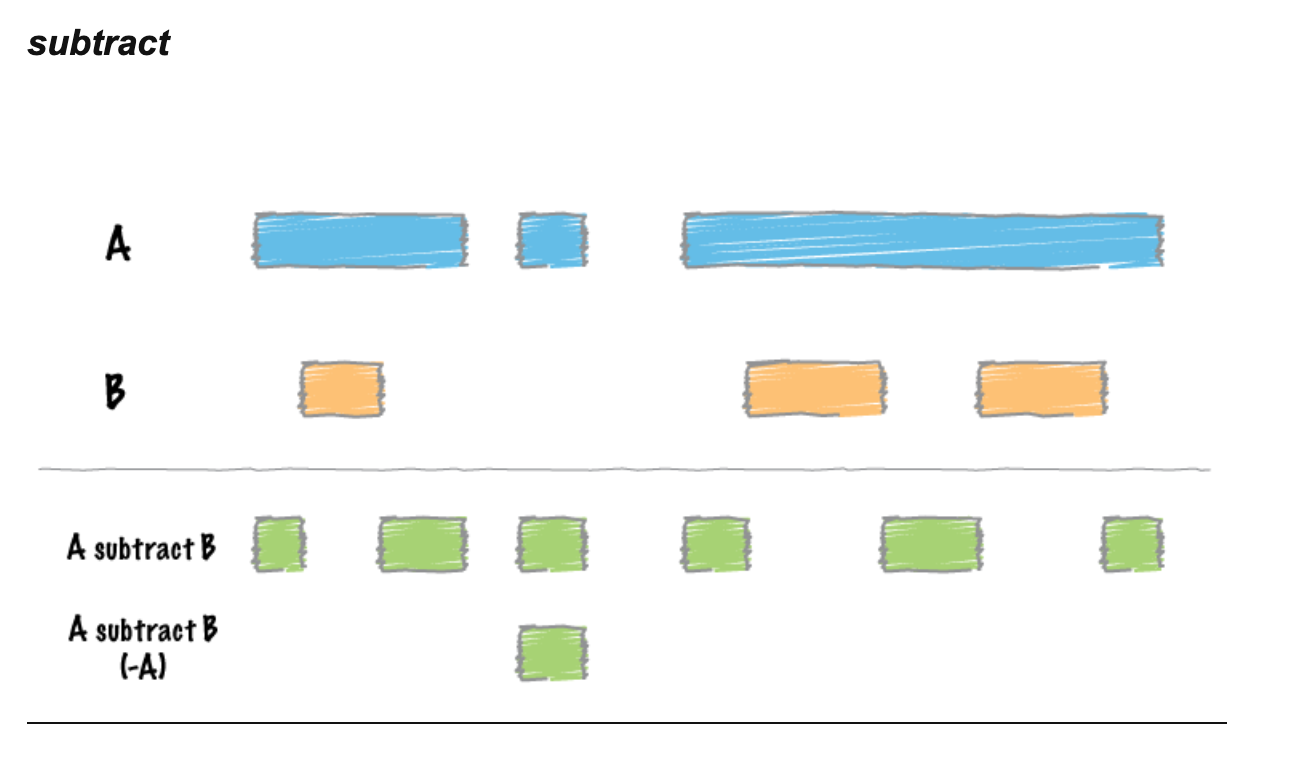

In [73]:
Image('figures/Substract.png')

This is a quick way to inverse a gene bed file and we want to work on both.


In [74]:
!bedtools subtract ### > datasets/noIAA_up.gene.bed6

In [75]:
!bedtools subtract


Tool:    bedtools subtract (aka subtractBed)
Version: v2.27.1
Summary: Removes the portion(s) of an interval that is overlapped
	 by another feature(s).

Usage:   bedtools subtract [OPTIONS] -a <bed/gff/vcf> -b <bed/gff/vcf>

Options: 
	-A	Remove entire feature if any overlap.  That is, by default,
		only subtract the portion of A that overlaps B. Here, if
		any overlap is found (or -f amount), the entire feature is removed.

	-N	Same as -A except when used with -f, the amount is the sum
		of all features (not any single feature).

	-wb	Write the original entry in B for each overlap.
		- Useful for knowing _what_ A overlaps. Restricted by -f and -r.

	-wo	Write the original A and B entries plus the number of base
		pairs of overlap between the two features.
		- Overlaps restricted by -f and -r.
		  Only A features with overlap are reported.

	-s	Require same strandedness.  That is, only report hits in B
		that overlap A on the _same_ strand.
		- By default, overlaps are reported witho

### Now we have two gene beds we want to work with 

**(IAA_up.gene.bed6)** and not upregulated genes **(noIAA_up.gene.bed6)**

## Get the promoters with bedtools [flank](https://bedtools.readthedocs.io/en/latest/content/tools/flank.html?highlight=flank)

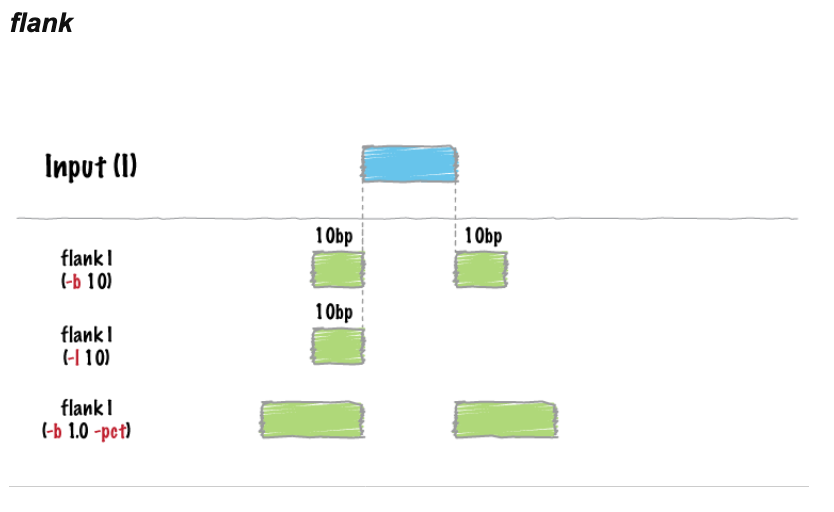

In [76]:
Image('figures/Flank.png')

In [77]:
!bedtools flank ##### > datasets/IAA_up.promoter.bed6 

In [78]:
!bedtools flank


*****
*****ERROR: Need both a BED (-i) and a genome (-g) file. 
*****

*****
*****ERROR: Need -l and -r together or -b alone. 
*****

Tool:    bedtools flank (aka flankBed)
Version: v2.27.1
Summary: Creates flanking interval(s) for each BED/GFF/VCF feature.

Usage:   bedtools flank [OPTIONS] -i <bed/gff/vcf> -g <genome> [-b <int> or (-l and -r)]

Options: 
	-b	Create flanking interval(s) using -b base pairs in each direction.
		- (Integer) or (Float, e.g. 0.1) if used with -pct.

	-l	The number of base pairs that a flank should start from
		orig. start coordinate.
		- (Integer) or (Float, e.g. 0.1) if used with -pct.

	-r	The number of base pairs that a flank should end from
		orig. end coordinate.
		- (Integer) or (Float, e.g. 0.1) if used with -pct.

	-s	Define -l and -r based on strand.
		E.g. if used, -l 500 for a negative-stranded feature, 
		it will start the flank 500 bp downstream.  Default = false.

	-pct	Define -l and -r as a fraction of the feature's length.
		E.g. if used 

### exercise III
Generate the promoters for the noIAA_up.gene.bed6 file

In [79]:
!bedtools flank ##### > datasets/noIAA_up.promoter.bed6 

## Get the promoters with bedtools [getfasta](https://bedtools.readthedocs.io/en/latest/content/tools/getfasta.html?highlight=getfasta)

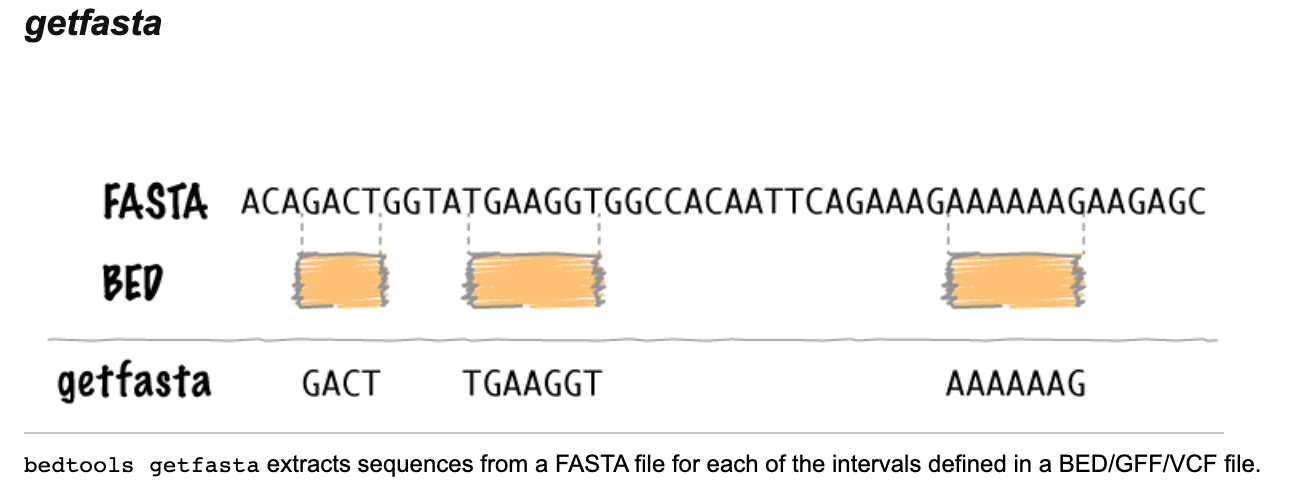

In [80]:
Image('figures/Getfasta.png')

In [81]:
!bedtools getfasta #### >  datasets/IAA_up.promoter.fa

In [82]:
!bedtools getfasta


Tool:    bedtools getfasta (aka fastaFromBed)
Version: v2.27.1
Summary: Extract DNA sequences from a fasta file based on feature coordinates.

Usage:   bedtools getfasta [OPTIONS] -fi <fasta> -bed <bed/gff/vcf>

Options: 
	-fi	Input FASTA file
	-fo	Output file (opt., default is STDOUT
	-bed	BED/GFF/VCF file of ranges to extract from -fi
	-name	Use the name field for the FASTA header
	-name+	Use the name field and coordinates for the FASTA header
	-split	given BED12 fmt., extract and concatenate the sequences
		from the BED "blocks" (e.g., exons)
	-tab	Write output in TAB delimited format.
		- Default is FASTA format.

	-s	Force strandedness. If the feature occupies the antisense,
		strand, the sequence will be reverse complemented.
		- By default, strand information is ignored.

	-fullHeader	Use full fasta header.
		- By default, only the word before the first space or tab 
		is used.



### exercise IV
Get the fasta sequence for the noIAA_up.promotor.bed6 file

In [83]:
!bedtools getfasta #### >  datasets/noIAA_up.promoter.fa

### Back to biopython to count the Auxin/IAA features in promoters

In [84]:
IAA_pro_motif_counter = 0
IAA_pro_counter = 0
for #######:
    IAA_pro_counter += 1
    if #######:
        IAA_pro_motif_counter += 1

In [85]:
print('There are', IAA_pro_motif_counter, 'out of', IAA_pro_counter, \
      'upregulated IAA gene promoters which contain one of the two IAA sequences.')
print('This is', IAA_pro_motif_counter/IAA_pro_counter*100, '%.')

There are 4 out of 298 upregulated IAA gene promoters which contain one of the two IAA sequences.
This is 1.342281879194631 %.


### exercise V
Count the promoter sequences of genes not upregualted by IAA and how many contain the motifs

In [86]:
noIAA_pro_motif_counter = 0
noIAA_pro_counter = 0
for pro in #####:
    noIAA_pro_counter += 1
    if ####:
        noIAA_pro_motif_counter += 1

In [87]:
print('There are', noIAA_pro_motif_counter, 'out of', noIAA_pro_counter, \
      'not upregulated IAA gene promoters which contain one of the two IAA sequences.')
print('This is', noIAA_pro_motif_counter/noIAA_pro_counter*100, '%.')

There are 451 out of 28199 not upregulated IAA gene promoters which contain one of the two IAA sequences.
This is 1.5993474945920068 %.


### What is your conclusion?